In [1]:
import tensorflow as tf
import os
import imghdr
import cv2

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
data_dir = "data"
image_type = ['jpeg', 'png', 'jpg', 'bmp']


In [5]:
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,folder)):
        path = os.path.join(data_dir,folder,image)
        try:
            img = cv2.imread(path)
            tip = imghdr.what(path)
            if tip not in image_type:
                os.remove(path)
                print("removed")
        except Exception as e: 
            print('Issue with image {}'.format(path))

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Found 454 images belonging to 2 classes.


In [7]:
print??

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [23]:
data = tf.keras.utils.image_dataset_from_directory("data",image_size=(128, 128))


Found 455 files belonging to 2 classes.


In [24]:
data = data.map(lambda x,y:(x/255,y))

In [25]:
data_iterator = data.as_numpy_iterator()


In [31]:
batch = data_iterator.next()

In [32]:
batch

(array([[[[0.38267463, 0.5513021 , 0.44149816],
          [0.39116114, 0.5597886 , 0.44998467],
          [0.39964768, 0.5682751 , 0.4584712 ],
          ...,
          [0.60713845, 0.7600797 , 0.64635414],
          [0.5992143 , 0.7521555 , 0.63843   ],
          [0.59607846, 0.7490196 , 0.63529414]],
 
         [[0.38371187, 0.5523393 , 0.4425354 ],
          [0.39116114, 0.5597886 , 0.44998467],
          [0.4021293 , 0.57075673, 0.46095282],
          ...,
          [0.60713845, 0.7600797 , 0.64635414],
          [0.6       , 0.7529412 , 0.6392157 ],
          [0.5975228 , 0.75046396, 0.6367385 ]],
 
         [[0.38668585, 0.5553133 , 0.44550937],
          [0.3950827 , 0.56371015, 0.45390624],
          [0.40376443, 0.57239187, 0.46258795],
          ...,
          [0.60749084, 0.760432  , 0.6467065 ],
          [0.6029803 , 0.7559215 , 0.642196  ],
          [0.6       , 0.7529412 , 0.6392157 ]],
 
         ...,
 
         [[0.25882354, 0.39215687, 0.29411766],
          [0.26290

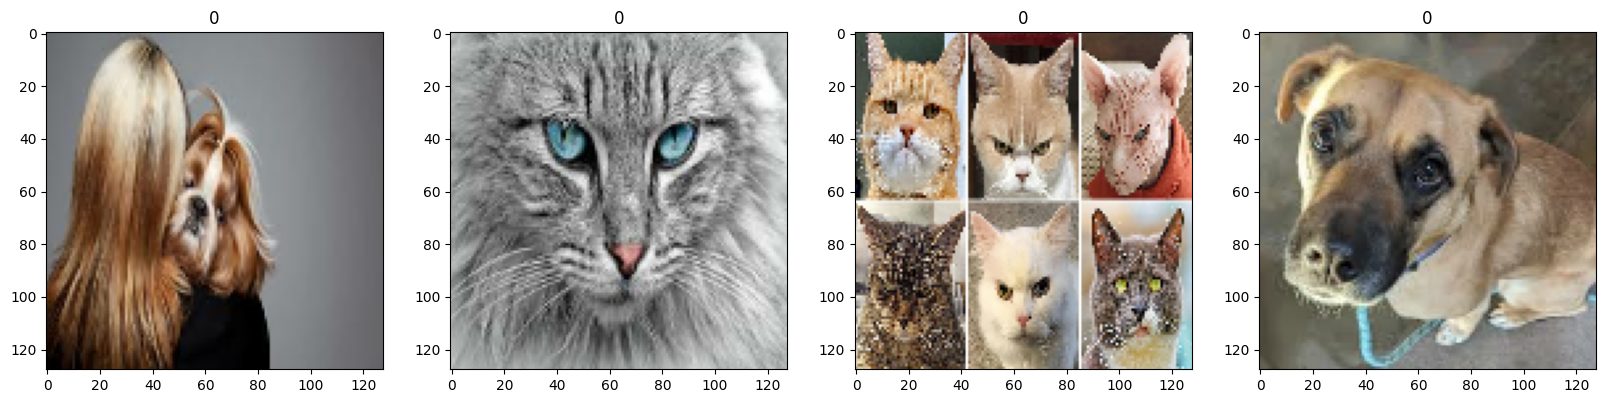

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][4:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [12]:
len(data)

15

In [13]:
train_s = int(len(data)*.7)
val_s = int(len(data)*.2)
test_s = int(len(data)*.1)+1

In [14]:
print(train_s+val_s+test_s)

15


In [15]:
train = data.take(train_s)
val = data.skip(train_s).take(val_s)
test = data.skip(train_s+val_s).take(test_s)

In [16]:
print(len(train)+len(val)+len(test))

15


In [17]:
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout


In [18]:
from tensorflow.keras.regularizers import l2

In [41]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    #Dropout(0.2),
    #Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    #MaxPooling2D((2, 2)),
    #Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [42]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 63504)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8128640   
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,129,217
Trainable params: 8,129,217
Non-trainable params: 0
____________________________________________

In [44]:
log_dir = 'logs'


In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


In [46]:
tensorboard_callback

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


10/10 [==============================] - 4s 300ms/step - loss: 3.1627 - accuracy: 0.5188 - val_loss: 1.5760 - val_accuracy: 0.5208
Epoch 2/20
10/10 [==============================] - 4s 287ms/step - loss: 1.1658 - accuracy: 0.6219 - val_loss: 1.2002 - val_accuracy: 0.5104
Epoch 3/20
10/10 [==============================] - 4s 283ms/step - loss: 0.9969 - accuracy: 0.6062 - val_loss: 0.6198 - val_accuracy: 0.7917
Epoch 4/20
10/10 [==============================] - 3s 278ms/step - loss: 0.7131 - accuracy: 0.7219 - val_loss: 0.4830 - val_accuracy: 0.8750
Epoch 5/20
10/10 [==============================] - 3s 275ms/step - loss: 0.6051 - accuracy: 0.7906 - val_loss: 0.5766 - val_accuracy: 0.8333
Epoch 6/20
10/10 [==============================] - 3s 268ms/step - loss: 0.4992 - accuracy: 0.8719 - val_loss: 0.4378 - val_accuracy: 0.9375
Epoch 7/20
10/10 [==============================] - 3s 276ms/step - loss: 0.4489 - accuracy: 0.9125 - val_loss: 0.4229 - val_accuracy: 0.9271
Epoch 8/20
10/10 